<a href="https://colab.research.google.com/github/ShriAmogh/Deep_Learning/blob/main/multiClass_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf


In [2]:
from tensorflow.keras.datasets import fashion_mnist

In [29]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [ ]:
print(f"Training data:\n{train_data[0]}\n")
print(f"Testing data:\n{train_labels[0]}\n")

Training data:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1

In [4]:
import matplotlib.pyplot as plt


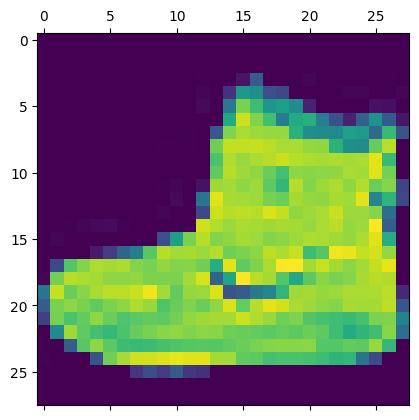

In [5]:
plt.matshow(train_data[0])

In [8]:
classes = {0	:"T-shirt/top",
1 :	"Trouser" ,
2:	"Pullover" ,
3	:"Dress",
4:"Coat",
5	:"Sandal",
6:"Shirt",
7	:"Sneaker",
8	:"Bag",
9	:"Ankle boot"}

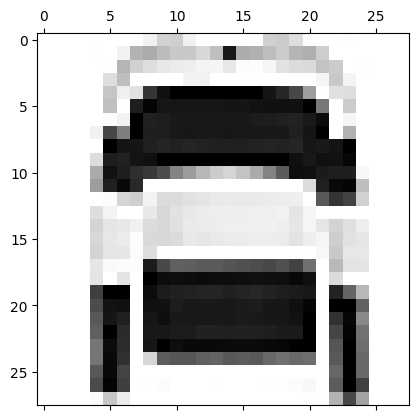

In [13]:
index_of_choice = 125
plt.matshow(train_data[index_of_choice], cmap =plt.cm.binary);


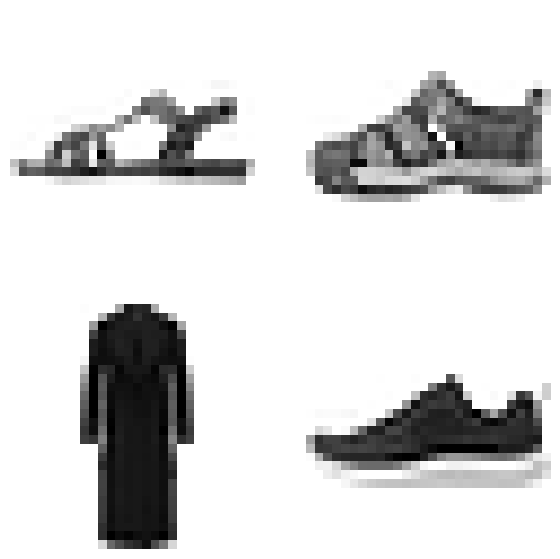

In [14]:
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax  = plt.subplot(2,2 , i+1)
  random_image = random.choice(range(len(train_data)))
  plt.imshow(train_data[random_image], cmap = plt.cm.binary)
  plt.axis(False)


In [15]:
from keras.src.layers.serialization import activation

tf.random.set_seed(42)
model_fashion = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape= (28, 28)),
    tf.keras.layers.Dense(4 , activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(4 , activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation = tf.keras.activations.softmax)
])

model_fashion.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                      optimizer = tf.keras.optimizers.Adam(),
                      metrics = ['accuracy'])

non_norm_history = model_fashion.fit(train_data, train_labels, epochs = 10,
                                     validation_data = (test_data, test_lables ))

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 2.4342 - accuracy: 0.0974 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0985 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3028 - val_accuracy:

In [16]:
#now use normalized data

train_data_norm = train_data /255.0
test_data_norm = test_data / 255.0

In [17]:
tf.random.set_seed(42)
model_fashion_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape= (28, 28)),
    tf.keras.layers.Dense(4 , activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(4 , activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation = tf.keras.activations.softmax)
])

model_fashion_2.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                      optimizer = tf.keras.optimizers.Adam(),
                      metrics = ['accuracy'])

norm_history = model_fashion_2.fit(train_data_norm, train_labels, epochs = 10,
                                     validation_data = (test_data_norm, test_lables ))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.4293 - accuracy: 0.4875 - val_loss: 0.9249 - val_accuracy: 0.6852
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8100 - accuracy: 0.7215 - val_loss: 0.8021 - val_accuracy: 0.7364
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6912 - accuracy: 0.7724 - val_loss: 0.6847 - val_accuracy: 0.7751
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6358 - accuracy: 0.7901 - val_loss: 0.6546 - val_accuracy: 0.7814
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6103 - accuracy: 0.7957 - val_loss: 0.6601 - val_accuracy: 0.7790
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5931 - accuracy: 0.7978 - val_loss: 0.6491 - val_accuracy: 0.7845
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5819 - accuracy: 0.8030 - val_loss: 0.6517 - val_accuracy:

In [18]:
import pandas as pd
non_norm = pd.DataFrame(non_norm_history.history, columns = ['loss', 'accuracy', 'val_loss', 'val_accuracy'])
norm =  pd.DataFrame(norm_history.history, columns = ['loss', 'accuracy', 'val_loss', 'val_accuracy'])

<Axes: title={'center': 'Normalized'}>

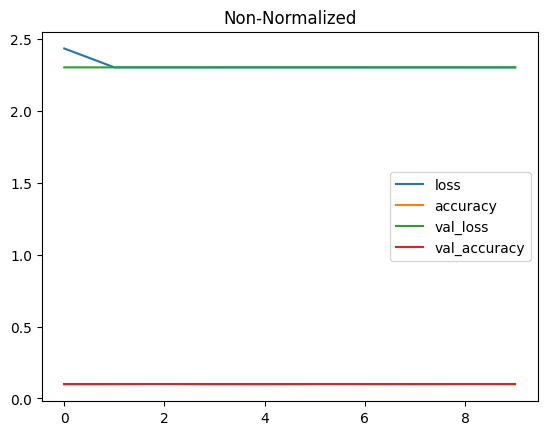

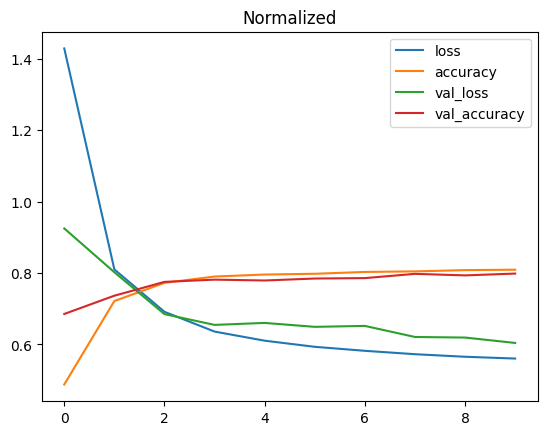

In [19]:

non_norm.plot(title = 'Non-Normalized')


norm.plot(title = 'Normalized')

In [20]:
from sklearn.metrics import confusion_matrix

In [31]:
y_pred_2 = model_fashion_2.predict(test_data_norm)
y_pred_2, test_labels

313/313 [==============================] - 1s 3ms/step


(array([[2.51051206e-05, 4.77157158e-09, 1.33867679e-05, ...,
         3.29769403e-02, 9.03958571e-04, 3.48071963e-01],
        [7.63536838e-04, 5.51252218e-16, 9.56425250e-01, ...,
         9.27609890e-26, 1.13218557e-03, 0.00000000e+00],
        [1.01884245e-03, 9.62605417e-01, 6.49738184e-04, ...,
         5.43918926e-04, 2.06424529e-03, 2.05803779e-04],
        ...,
        [2.52024502e-01, 1.03606617e-04, 3.07650000e-01, ...,
         6.44366906e-08, 2.60152239e-02, 5.70832326e-19],
        [1.01884245e-03, 9.62605417e-01, 6.49738184e-04, ...,
         5.43918926e-04, 2.06424529e-03, 2.05803779e-04],
        [4.77467803e-03, 5.72307908e-05, 6.34637615e-03, ...,
         1.03336405e-02, 1.03004679e-01, 3.71588918e-04]], dtype=float32),
 array([9, 2, 1, ..., 8, 1, 5], dtype=uint8))

In [32]:
confusion_matrix( y_pred = y_pred_2, y_true = test_labels)

ValueError: ignored

In [39]:
import random

def plot_random_image(model,classes,images,true_label):

  i = random.randint(0, len(images))

  target_image = images[i]
  pred_prob = model.predict(target_image.reshape(1 , 28,28))
  pred_label = classes[pred_prob.argmax()]
  true_label = classes[true_label[i]]

  plt.imshow(target_image , cmap = plt.cm.binary)


  if pred_label == true_label:
    color = 'green'

  else:
    color = 'red'

  plt.xlabel(f'Pred :{pred_label}{100*tf.reduce_max(pred_prob)}% (True :{true_label})' , color = color)

1/1 [==============================] - 0s 31ms/step


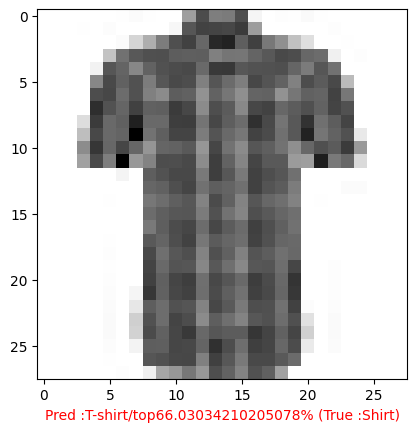

In [49]:
plot_random_image(model= model_fashion_2, classes = classes, images = test_data_norm, true_label = test_labels)

In [50]:
model_fashion_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 4)                 3140      
                                                                 
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
 dense_5 (Dense)             (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [51]:
from tensorflow.keras.utils import plot_model

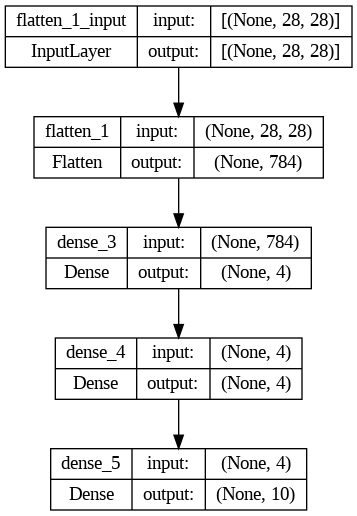

In [52]:
plot_model(model_fashion_2 , show_shapes=True)